In [1]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install seaborn

In [5]:
#Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import math
import io
import category_encoders as ce
from category_encoders import *
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, multilabel_confusion_matrix, precision_recall_fscore_support, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_det_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [7]:
#Importing the CSV file without the Unnamed:0 and checking the columns and datatypes and null values-

In [8]:
filename = ("refugee_acceptance_dataset.csv")

In [9]:
df = pd.read_csv(filename, index_col=0)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   language                                    100000 non-null  object
 1   education_level                             100000 non-null  object
 2   last_occupation                             100000 non-null  object
 3   qualified_for_unhcr_mandatory_contribution  100000 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [39]:
df.head()

,language,education_level,last_occupation,qualified_for_unhcr_mandatory_contribution
0,Native + French,High School,Not employed,not accepted
1,Native + English,High School,Construction Worker,not accepted
2,Native,Primary,Mechanic,not accepted
3,Native + English,Primary,Mechanic,not accepted
4,Native + English,High School,Not employed,not accepted


In [40]:
df1 = df[['language','education_level', 'last_occupation', 'qualified_for_unhcr_mandatory_contribution']]
df1.tail()

,language,education_level,last_occupation,qualified_for_unhcr_mandatory_contribution
99995,Native,Undergrad,Sales Professional,accepted
99996,Native + French,High School,Farmer,not accepted
99997,Native + English + French,Associate Degree,Civil Engineer,accepted
99998,Native + English,No Education,Fisher,not accepted
99999,Native + English,No Education,Fisher,not accepted


In [41]:
#Checking the class distribtion of the target label

In [42]:
df2 = df[['language','education_level', 'last_occupation', 'qualified_for_unhcr_mandatory_contribution']]
df2.tail()

,language,education_level,last_occupation,qualified_for_unhcr_mandatory_contribution
99995,Native,Undergrad,Sales Professional,accepted
99996,Native + French,High School,Farmer,not accepted
99997,Native + English + French,Associate Degree,Civil Engineer,accepted
99998,Native + English,No Education,Fisher,not accepted
99999,Native + English,No Education,Fisher,not accepted


In [43]:
 df3=pd.get_dummies(df2, columns=['language','education_level','last_occupation', 'qualified_for_unhcr_mandatory_contribution'])

In [44]:
df3 = df3[np.all(np.isfinite(df3), axis=1)]

In [45]:
df3.head()

,language_Native,language_Native + English,language_Native + English + French,language_Native + French,education_level_Associate Degree,education_level_High School,education_level_Masters,education_level_No Education,education_level_PhD,education_level_Primary,...,last_occupation_Nurses and Personal Carers,last_occupation_Petroleum Engineer,last_occupation_Pharmaceutical Professional,last_occupation_Physical Therapist,last_occupation_Sales Professional,last_occupation_Software Developer,last_occupation_University Lecturer,last_occupation_Vet,qualified_for_unhcr_mandatory_contribution_accepted,qualified_for_unhcr_mandatory_contribution_not accepted
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df3['qualified_for_unhcr_mandatory_contribution_accepted'].value_counts()

0    65245
1    34755
Name: qualified_for_unhcr_mandatory_contribution_accepted, dtype: int64

In [47]:
df3_train, df3_test = train_test_split(df3, test_size=0.2)

In [48]:
x_train = df3_train.drop(['qualified_for_unhcr_mandatory_contribution_accepted', 'qualified_for_unhcr_mandatory_contribution_not accepted'], axis=1)
x_test = df3_test.drop(['qualified_for_unhcr_mandatory_contribution_accepted', 'qualified_for_unhcr_mandatory_contribution_not accepted'], axis=1)

In [49]:
x_train.head()

,language_Native,language_Native + English,language_Native + English + French,language_Native + French,education_level_Associate Degree,education_level_High School,education_level_Masters,education_level_No Education,education_level_PhD,education_level_Primary,...,last_occupation_Newtwork Engineer,last_occupation_Not employed,last_occupation_Nurses and Personal Carers,last_occupation_Petroleum Engineer,last_occupation_Pharmaceutical Professional,last_occupation_Physical Therapist,last_occupation_Sales Professional,last_occupation_Software Developer,last_occupation_University Lecturer,last_occupation_Vet
55878,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80055,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
92374,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28596,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
70555,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y_train = df3_train[['qualified_for_unhcr_mandatory_contribution_accepted', 'qualified_for_unhcr_mandatory_contribution_not accepted']]
y_test = df3_test[['qualified_for_unhcr_mandatory_contribution_accepted', 'qualified_for_unhcr_mandatory_contribution_not accepted']]

In [51]:
y_train.tail()

,qualified_for_unhcr_mandatory_contribution_accepted,qualified_for_unhcr_mandatory_contribution_not accepted
77181,0,1
78870,1,0
19540,0,1
1992,0,1
38559,0,1


In [52]:
#creating a new dataframe with the desired features and labels

In [53]:
df2 = df[['language','education_level', 'last_occupation', 'qualified_for_unhcr_mandatory_contribution']]
df2.tail()

,language,education_level,last_occupation,qualified_for_unhcr_mandatory_contribution
99995,Native,Undergrad,Sales Professional,accepted
99996,Native + French,High School,Farmer,not accepted
99997,Native + English + French,Associate Degree,Civil Engineer,accepted
99998,Native + English,No Education,Fisher,not accepted
99999,Native + English,No Education,Fisher,not accepted


In [54]:
#OneHotEncoder

In [55]:
add_columns1 = pd.get_dummies(df2, columns=['language','education_level','last_occupation', 'qualified_for_unhcr_mandatory_contribution'])

In [56]:
add_columns2 = df2.drop(['qualified_for_unhcr_mandatory_contribution'], axis=1)

In [57]:
add_columns2 = pd.get_dummies(df2, columns=['language','education_level','last_occupation', 'qualified_for_unhcr_mandatory_contribution'])

In [58]:
add_columns1

,language_Native,language_Native + English,language_Native + English + French,language_Native + French,education_level_Associate Degree,education_level_High School,education_level_Masters,education_level_No Education,education_level_PhD,education_level_Primary,...,last_occupation_Nurses and Personal Carers,last_occupation_Petroleum Engineer,last_occupation_Pharmaceutical Professional,last_occupation_Physical Therapist,last_occupation_Sales Professional,last_occupation_Software Developer,last_occupation_University Lecturer,last_occupation_Vet,qualified_for_unhcr_mandatory_contribution_accepted,qualified_for_unhcr_mandatory_contribution_not accepted
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
99996,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
99998,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
add_columns2 = add_columns2[np.all(np.isfinite(add_columns2), axis=1)]

In [60]:
#making the features and target labels

In [61]:
X = df1.drop(['qualified_for_unhcr_mandatory_contribution'], axis=1) 
y = df1['qualified_for_unhcr_mandatory_contribution']

In [62]:
X = add_columns1.drop(['qualified_for_unhcr_mandatory_contribution_accepted', 'qualified_for_unhcr_mandatory_contribution_not accepted'], axis=1) #add_columns
y = add_columns1[['qualified_for_unhcr_mandatory_contribution_accepted', 'qualified_for_unhcr_mandatory_contribution_not accepted']]

<AxesSubplot:ylabel='None'>

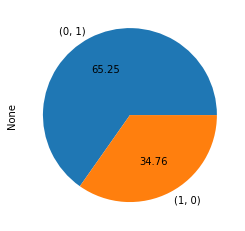

In [63]:
#Showing Piechart
y.value_counts().plot.pie(autopct='%.2f')

In [64]:
#Trying to balance the minority by random undersmapling of the majority class

In [65]:
from imblearn.under_sampling import RandomUnderSampler

#randomUnderSample = RandomUnderSampler(sampling_strategy=1) #for Float
randomUnderSample = RandomUnderSampler(sampling_strategy="not minority") #for string

X_resample, y_resample = randomUnderSample.fit_resample(X, y)

#ax = y_resample.value_counts().plot.pie(autopct='%.2f')
#_=ax.set_title('Random Under Sampling')

AttributeError: 'DataFrame' object has no attribute 'argmax'

In [66]:
#Class Distribution

In [67]:
y_resample.value_counts()

NameError: name 'y_resample' is not defined

In [68]:
#Trying to balance the minority by random oversmapling the minority class

In [69]:
from imblearn.over_sampling import RandomOverSampler

#randoverS = RandomOVerSampler(sampling_strategy=1) #Float
randoverS = RandomOverSampler(sampling_strategy="not majority") #String

X_resample, y_resample = randoverS.fit_resample(X, y)

ax = y_resample.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Random Under Sampling")

AttributeError: 'DataFrame' object has no attribute 'argmax'

In [70]:
#Class Distribution

In [71]:
y_resample.value_counts()

NameError: name 'y_resample' is not defined

In [72]:
#OneHotEncoding for the resampled X and 

In [ ]:
add_columns3 = pd.get_dummies(X_resample, columns=['language','education_level', 'last_occupation'])

In [ ]:
add_columns4 = pd.get_dummies(y_resample, columns=['qualified_for_unhcr_mandatory_contribution'])

In [ ]:
add_columns5 = add_columns3.join(add_columns4)

In [ ]:
add_columns5

In [ ]:
add_columns5.columns

In [ ]:
add_columns5 = add_columns[np.all(np.isfinite(add_columns), axis=1)]

In [ ]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resample, y_resample, test_size=0.20, random_state=0)

In [ ]:
add_columns = add_columns[np.all(np.isfinite(add_columns), axis=1)]

In [ ]:
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
~#Seperating the categorical data for onehot encoding/dummy encoding using pandas

In [ ]:
df3 = df[['language','education_level', 'last_occupation']]
df3.tail()

In [ ]:
add_columns = pd.get_dummies(df2, columns=['language','education_level', 'last_occupation'])

In [ ]:
add_columns.columns

In [ ]:
#splitting the data for training and testing as well as the target dataset

In [ ]:
x_train = add_columns.iloc[:,:-1]
y_train = df2["qualified_for_unhcr_mandatory_contribution"]

x_test = add_columns.iloc[:,:-1]
y_test = df2["qualified_for_unhcr_mandatory_contribution"]

x_test = add_columns.iloc[:,:-1]
y_test = df2["qualified_for_unhcr_mandatory_contribution"]

print("shape of original dataset :", df2.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

In [ ]:
#Applying Standard Scaler and fit transformation

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
add_columns = add_columns[np.all(np.isfinite(add_columns), axis=1)]

In [ ]:
#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=100 ,warm_start=True)
MLP.fit(X_train, y_train.values.ravel())

In [ ]:
prediction = MLP.predict(X_test)

In [ ]:
accuracy_score(y_test,prediction)

In [ ]:
cm = confusion_matrix(y_test, prediction)
plt.title('Heatmap of Confusion matrix', fontsize = 12)
sns.heatmap(cm, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
#Logestic Regrassion

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
accuracy_score(y_test, prediction)

In [ ]:
cm = confusion_matrix(y_test, prediction)
plt.title('Heatmap of Confusion matrix', fontsize = 12)
sns.heatmap(cm, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
#Using randomForest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clas = RandomForestClassifier(n_estimators= 20, criterion= 'entropy', random_state= 51)
rf_clas.fit(X_train, y_train)
y_pred = rf_clas.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.title('HeatMap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot= True, fmt = "d")
plt.show()

In [ ]:
#Hyperparameter tuning

In [ ]:
params={
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200, 300, 400, 500],
    'max_features': [1,2,3],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'min_samples_leaf': [1,2,3,4],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_clas, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3, random_state=51)
random_search.fit(x_train, y_train)

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_estimator_

In [ ]:
#hypertuned RFClassifier

In [ ]:
rf_clas = RandomForestClassifier(criterion='entropy', max_features=2, min_samples_leaf=4,
                       n_estimators=300, random_state=51)
rf_clas.fit(x_train, y_train)
y_pred = rf_clas.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.title('HeatMap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot= True, fmt = "d")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
#NonHypertuned but explorative RFClassifier

In [ ]:
rf_clas = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', 
                                 criterion='entropy', max_depth=10, max_features=3,
                                 min_samples_leaf=1, n_estimators= 500, random_state=51)
rf_clas.fit(x_train, y_train)
y_pred = rf_clas.predict(x_test)
accuracy_score(y_test, y_pred)


In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.title('HeatMap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot= True, fmt = "d")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
#for saving and loading the model

In [ ]:
#import joblib
#joblib_acceptance_p = "acceptance_p_model1.pkl"
#joblib.dump(rf_clas, joblib_acceptance_p)